## Sparse Signal Recovery With Orthogonal Matching Pursuit
如何使用 `Orthogonal Matching Pursuit (OMP)` 技術，從雜訊中成功恢復一個原本稀疏的訊號，並利用 `scikit-learn` 套件進行實作與視覺化。
- 了解何謂稀疏訊號與字典學習（dictionary learning）。
- 使用 OMP 演算法從觀測資料中恢復出稀疏信號。
- 比較無雜訊、含雜訊、交叉驗證選擇非零數量下的重建效果。
<br><br>
- `matplotlib.pyplot`：視覺化用
- `numpy`：數值運算
- `OrthogonalMatchingPursuit`：主角演算法（OMP）
- `OrthogonalMatchingPursuitCV`：具交叉驗證功能的 OMP
- `make_sparse_coded_signal`：用來產生一組合成的稀疏訊號

## Import Libraries

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

## Generate the Data

- 我們建立一個 512 維的字典（n_components = 512）
- 每個訊號是由 100 個特徵組成（n_features = 100）
- 僅有 17 個係數為非零值（稀疏性）
- 最後我們加入高斯雜訊，模擬真實世界測量中的干擾。

In [15]:
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)
X = X.T

(idx,) = w.nonzero()

# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

## Plot the Sparse Signal

<StemContainer object of 3 artists>

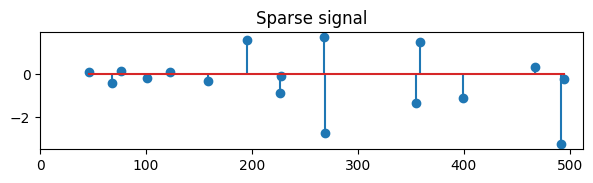

In [16]:
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

## Plot the Noise-Free Reconstruction
### 1️⃣ 無雜訊情況（Noise-free）

- 使用正確的非零數量 `n_nonzero_coefs=17` 執行 OMP。
- 重建結果與原始訊號接近。

<StemContainer object of 3 artists>

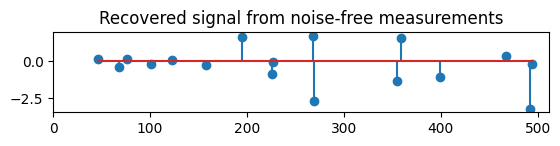

In [17]:
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

## Plot the Noisy Reconstruction

### 2️⃣ 有雜訊情況（Noisy）

- 相同設定下從雜訊資料重建。
- 可見部分非零項目仍正確，但雜訊影響辨識效果。

<StemContainer object of 3 artists>

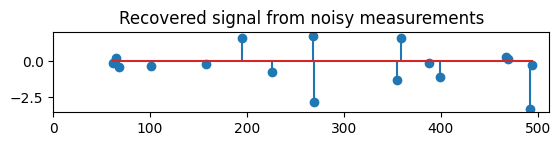

In [18]:
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

## Plot the Noisy Reconstruction with Number of Non-zeros Set by CV

### 3️⃣ 使用交叉驗證自動設定非零項目數量

- 使用 `OrthogonalMatchingPursuitCV()`，由模型自動選擇最佳非零數量。
- 結果更加穩健，可因應雜訊程度調整模型複雜度。

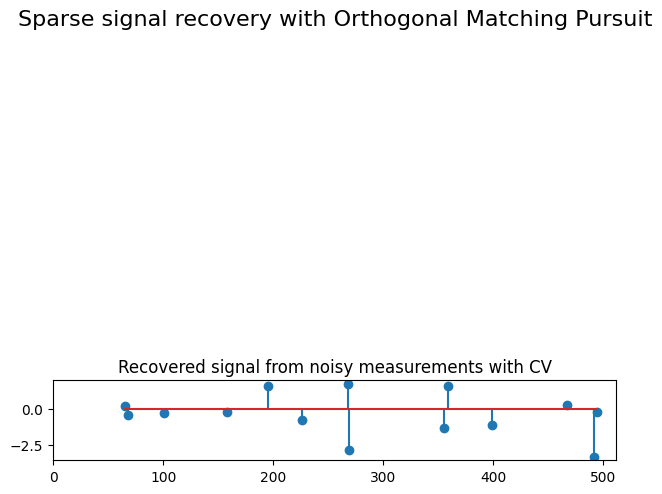

In [19]:
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()

1. 什麼是稀疏訊號（Sparse Signal）
2. 如何用 Orthogonal Matching Pursuit 從訊號中恢復稀疏資訊
3. 雜訊會影響模型，但可以透過交叉驗證改善選擇非零項目的表現
4. OMP 非常適合用於字典學習、壓縮感測（Compressed Sensing）等應用

## 應用場景
- 壓縮感測
    - 使用稀疏表示對高維訊號進行有效編碼與還原
- 圖像重建
    - 從雜訊中重建稀疏圖像訊號
- 字典學習（Dictionary Learning）
    - 學習特徵基底並提取有代表性的稀疏成分
- 頻譜分析
    - 僅有少數頻段活動時，恢復頻譜結構


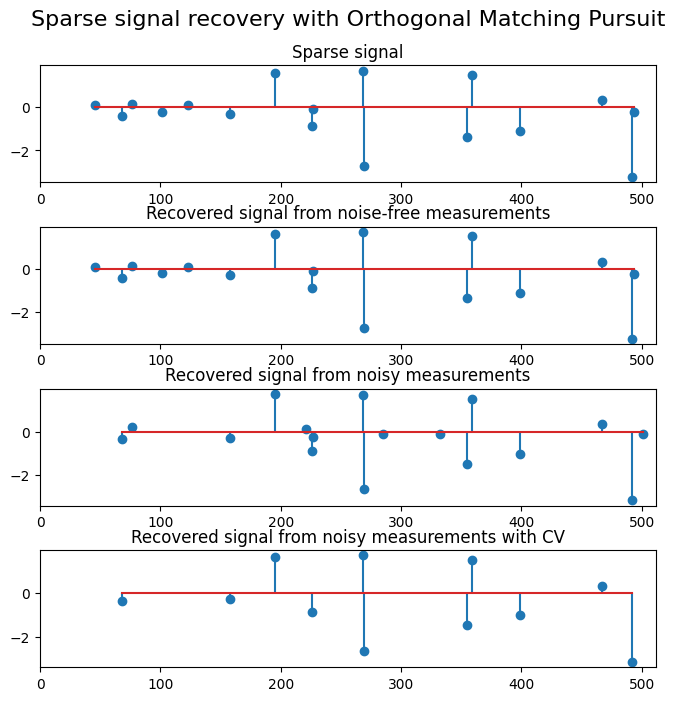

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

# 設定參數
n_components, n_features = 512, 100
n_nonzero_coefs = 17

# 產生稀疏編碼訊號： y = Xw，其中 w 只有 n_nonzero_coefs 個非零值
y, X, w = make_sparse_coded_signal(
    n_samples=1,
    n_components=n_components,
    n_features=n_features,
    n_nonzero_coefs=n_nonzero_coefs,
    random_state=0,
)
X = X.T
(idx,) = w.nonzero()  # 找出非零索引

# 加入雜訊
y_noisy = y + 0.05 * np.random.randn(len(y))

# 畫圖：原始稀疏訊號
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx])

# 無雜訊重建
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r])

# 有雜訊重建
omp.fit(X, y_noisy)
coef = omp.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r])

# 有雜訊 + 使用 CV 選擇非零數重建
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
(idx_r,) = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r])

# 調整圖表排版
plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle("Sparse signal recovery with Orthogonal Matching Pursuit", fontsize=16)
plt.show()
